<a href="https://colab.research.google.com/github/chungngoc/TP-Business-Intelligence/blob/main/Business_intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

# column_names = ["InvoiceNo","StockCode", "Description", "Quantity", "InvoiceDate", "UnitPrice", "CustomerID", "Country"]

df = pd.read_csv('/content/data.csv')

print(df)

       InvoiceNo StockCode  ... CustomerID         Country
0         536365    85123A  ...    17850.0  United Kingdom
1         536365     71053  ...    17850.0  United Kingdom
2         536365    84406B  ...    17850.0  United Kingdom
3         536365    84029G  ...    17850.0  United Kingdom
4         536365    84029E  ...    17850.0  United Kingdom
...          ...       ...  ...        ...             ...
541904    581587     22613  ...    12680.0          France
541905    581587     22899  ...    12680.0          France
541906    581587     23254  ...    12680.0          France
541907    581587     23255  ...    12680.0          France
541908    581587     22138  ...    12680.0          France

[541909 rows x 8 columns]


In [ ]:
#drop null
df = df.dropna()
print(df)
#Pas de valeurs négatives pour les quantités ou les prix
df = df[(df['Quantity']>0) & (df['UnitPrice']>0) ]
print(df)
#Le numéro de la facture est un nombre

df = df[df.InvoiceNo.str.isnumeric()]
print(df)

       InvoiceNo StockCode  ... CustomerID         Country
0         536365    85123A  ...    17850.0  United Kingdom
1         536365     71053  ...    17850.0  United Kingdom
2         536365    84406B  ...    17850.0  United Kingdom
3         536365    84029G  ...    17850.0  United Kingdom
4         536365    84029E  ...    17850.0  United Kingdom
...          ...       ...  ...        ...             ...
541904    581587     22613  ...    12680.0          France
541905    581587     22899  ...    12680.0          France
541906    581587     23254  ...    12680.0          France
541907    581587     23255  ...    12680.0          France
541908    581587     22138  ...    12680.0          France

[406829 rows x 8 columns]
       InvoiceNo StockCode  ... CustomerID         Country
0         536365    85123A  ...    17850.0  United Kingdom
1         536365     71053  ...    17850.0  United Kingdom
2         536365    84406B  ...    17850.0  United Kingdom
3         536365    84029G  .

In [ ]:
df.InvoiceDate= pd.to_datetime(df.InvoiceDate)
print(np.dtype(df.InvoiceDate))

df['year_month'] = df['InvoiceDate'].dt.strftime('%Y-%m')
print(df)

datetime64[ns]
       InvoiceNo StockCode  ...         Country  year_month
0         536365    85123A  ...  United Kingdom     2010-12
1         536365     71053  ...  United Kingdom     2010-12
2         536365    84406B  ...  United Kingdom     2010-12
3         536365    84029G  ...  United Kingdom     2010-12
4         536365    84029E  ...  United Kingdom     2010-12
...          ...       ...  ...             ...         ...
541904    581587     22613  ...          France     2011-12
541905    581587     22899  ...          France     2011-12
541906    581587     23254  ...          France     2011-12
541907    581587     23255  ...          France     2011-12
541908    581587     22138  ...          France     2011-12

[397884 rows x 9 columns]


In [ ]:
df.CustomerID =  df.CustomerID.astype(int)
distinc_ID = df.CustomerID.nunique()
print(distinc_ID)

df["price_total"] = df.UnitPrice * df.Quantity 
print(df)

price_total = df.groupby(["year_month"]).price_total.sum().reset_index(name='price_total')
nb_client =  df.groupby(["year_month"]).CustomerID.nunique().reset_index(name='nb_client')

KPI = pd.merge(price_total,nb_client, how ='left', on = ['year_month'])
KPI["KPIs"] = KPI.price_total / KPI.nb_client

print(KPI)

4338
       InvoiceNo StockCode  ... year_month  price_total
0         536365    85123A  ...    2010-12        15.30
1         536365     71053  ...    2010-12        20.34
2         536365    84406B  ...    2010-12        22.00
3         536365    84029G  ...    2010-12        20.34
4         536365    84029E  ...    2010-12        20.34
...          ...       ...  ...        ...          ...
541904    581587     22613  ...    2011-12        10.20
541905    581587     22899  ...    2011-12        12.60
541906    581587     23254  ...    2011-12        16.60
541907    581587     23255  ...    2011-12        16.60
541908    581587     22138  ...    2011-12        14.85

[397884 rows x 10 columns]
   year_month  price_total  nb_client        KPIs
0     2010-12   572713.890        885  647.134339
1     2011-01   569445.040        741  768.481835
2     2011-02   447137.350        758  589.890963
3     2011-03   595500.760        974  611.397084
4     2011-04   469200.361        856  548.13



---



Est-ce qu’il y a des mois ou les ventes sont plus élevés que d’autres mois Indépendamment du nombre de clients ?

In [ ]:
print(KPI.loc[KPI.price_total == KPI.price_total.max()])

n_largest = KPI.nlargest(3, 'price_total')
print(n_largest)

   year_month  price_total  nb_client       KPIs
11    2011-11   1161817.38       1664  698.20756
   year_month  price_total  nb_client        KPIs
11    2011-11  1161817.380       1664  698.207560
10    2011-10  1039318.790       1364  761.963922
9     2011-09   952838.382       1266  752.636953


On peut voir aue il y a 3 mois 9,10 et 11 de l'année 2011 ou les ventes sont plus élevés que d’autres mois (les autres mois sont environ 500000 - 600000 alors que ces 3 mois sont plus de 900000)



---



Nous voulons exploiter les habitudes de dépenses pour ceux qui dépensent le plus (les 5 clients qui ont dépensé le plus tout au long de l’année):
- Combien de commandes en moyenne (vous devez penser aux nombres de factures par
client) ont ces clients ?
- Est-ce qu’ils dépensent approximativement la même somme pour toutes leurs
commandes ?


In [ ]:
nb_facture_df = df.groupby(["CustomerID"]).InvoiceNo.nunique().reset_index(name='nb_facture')
nb_facture_df=nb_facture_df.sort_values(by = ['nb_facture'], ascending=True)
print(nb_facture_df)

#Combien de commandes en moyenne ?
print("moyenne de commande : " , nb_facture_df.nb_facture.mean())

      CustomerID  nb_facture
0          12346           1
1519       14420           1
3278       16812           1
3284       16820           1
3285       16823           1
...          ...         ...
1661       14606          93
562        13089          97
4010       17841         124
1879       14911         201
326        12748         209

[4338 rows x 2 columns]
moyenne de commande :  4.272014753342554


Il y a 4 facture en moyenne.

In [ ]:
somme_depense_df =  df.groupby(["CustomerID", "InvoiceNo"]).price_total.sum().reset_index(name='somme')
print(somme_depense_df)
print("_____________________________________")

approximation = somme_depense_df.groupby(["CustomerID"]).somme.std().reset_index(name='stand_dev')
approximation = approximation.dropna() # drop les Nan values
approximation = approximation.sort_values(by = ['stand_dev'], ascending=True) # sort values ascending

print(approximation)
print(approximation.loc[approximation.stand_dev == 0])
print("_____________________________________")

for i in approximation.loc[approximation.stand_dev == 0, "CustomerID"]:
  print(somme_depense_df.loc[somme_depense_df.CustomerID == i])

       CustomerID InvoiceNo     somme
0           12346    541431  77183.60
1           12347    537626    711.79
2           12347    542237    475.39
3           12347    549222    636.25
4           12347    556201    382.52
...           ...       ...       ...
18527       18283    579673    223.61
18528       18283    580872    208.00
18529       18287    554065    765.28
18530       18287    570715   1001.32
18531       18287    573167     70.68

[18532 rows x 3 columns]
_____________________________________
      CustomerID      stand_dev
1929       14987       0.000000
3540       17186       0.000000
3430       17029       0.000000
3653       17353       0.000000
3241       16766       0.000000
...          ...            ...
196        12590    6235.451444
2502       15749    6854.669639
55         12415    7774.349436
2011       15098   22226.807784
3008       16446  119123.945974

[2845 rows x 2 columns]
      CustomerID  stand_dev
1929       14987        0.0
3540       1718



---



Exercice 3 : L’utilisation d’algorithme de fouilles de données pour établir de nouvelles corrélations et analyses

a, Expliquer en quelques étapes c’est quoi les règles d’associations et pourquoi il est intéressant
pour nos données d’utiliser cet algorithme ?

-Règles d'assciation: est utilisé pour trouvé relations entre les attributs dans de grandes bases de données. Par exemple, avec une règle d'association comme suivant:
    
    Bread=> butter [support=2%, confidence-60%]
Cela signifie qu'il y a une transaction de 2% qui a acheté du pain et du beurre ensemble et que 60% des clients ont acheté du pain ainsi que du beurre.

Avec:

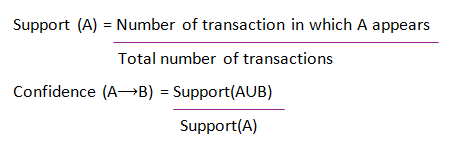

L'algorithme Apriori utilise deux étapes «joindre» et «élaguer» pour réduire l'espace de recherche. Donc il convient donc de réduire la vitesse d'analyse des grandes bases de données comme celles que nous utilisons. Ensuit, on peut trouver les règles association, donc on peut prédire les tendances d'achat de nos clients afin de pouvoir distribuer plus raisonnablement différents types d'articles.


**Etape 2 : Implémentation de l’analyse des données**

---



In [ ]:
!pip install apyori
from apyori import apriori
from mlxtend.frequent_patterns import  association_rules

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
df = pd.read_csv('/content/data.csv')

In [ ]:
#drop null
df = df.dropna()
print(df)
#Pas de valeurs négatives pour les quantités ou les prix
df = df[(df['Quantity']>0) & (df['UnitPrice']>0) ]
print(df)
#Le numéro de la facture est un nombre

df = df[df.InvoiceNo.str.isnumeric()]
print(df)

       InvoiceNo StockCode  ... CustomerID         Country
0         536365    85123A  ...    17850.0  United Kingdom
1         536365     71053  ...    17850.0  United Kingdom
2         536365    84406B  ...    17850.0  United Kingdom
3         536365    84029G  ...    17850.0  United Kingdom
4         536365    84029E  ...    17850.0  United Kingdom
...          ...       ...  ...        ...             ...
541904    581587     22613  ...    12680.0          France
541905    581587     22899  ...    12680.0          France
541906    581587     23254  ...    12680.0          France
541907    581587     23255  ...    12680.0          France
541908    581587     22138  ...    12680.0          France

[406829 rows x 8 columns]
       InvoiceNo StockCode  ... CustomerID         Country
0         536365    85123A  ...    17850.0  United Kingdom
1         536365     71053  ...    17850.0  United Kingdom
2         536365    84406B  ...    17850.0  United Kingdom
3         536365    84029G  .

In [ ]:
list_item_df = df.groupby(['InvoiceNo'])["StockCode"].unique().reset_index(name='list_item')
list_item_df = list_item_df.list_item
print(list_item_df)

freq_items = apriori(list_item_df, min_support=0.01, min_confidence = 0.03)

freq_items = pd.DataFrame(freq_items)
print(freq_items)
print("-------------------------------------------------")
print(freq_items.ordered_statistics[0])
print(freq_items.ordered_statistics[500])

freq_items.to_csv(r'/content/apriori.csv', index=False)

KPI.to_csv(r'/content/KPI.csv', index = False)
df.to_csv(r'/content/data_new.csv', index = False)


0        [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
1                                           [22633, 22632]
2        [84879, 22745, 22748, 22749, 22310, 84969, 226...
3                             [22960, 22913, 22912, 22914]
4                                                  [21756]
                               ...                        
18527                                       [20725, 85038]
18528                                       [20832, 85038]
18529    [22481, 22915, 22178, 22460, 84832, 23084, 848...
18530                         [22061, 23275, 21217, 20685]
18531    [22631, 22556, 22555, 22728, 22727, 22726, 227...
Name: list_item, Length: 18532, dtype: object
                            items  ...                                 ordered_statistics
0                         (20685)  ...          [((), (20685), 0.03108137276063026, 1.0)]
1                         (20724)  ...         [((), (20724), 0.039876969566155836, 1.0)]
2                         (20725)  